In [23]:
%%capture
!pip install pyglet==1.5.1
!apt install python-opengl
!apt install ffmpeg
!apt install xvfb
!pip3 install pyvirtualdisplay

# Virtual display
from pyvirtualdisplay import Display

virtual_display = Display(visible=0, size=(1400, 900))
virtual_display.start()

In [24]:
%%capture
!pip install gym==0.24
!pip install pygame
!pip install numpy

!pip install imageio imageio_ffmpeg

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
import numpy as np
import gym
import random
import time

In [26]:
my_map = [
    "SFFFH",
    "HFHFF",
    "FFFHF",
    "FHFFF",
    "HFFFG"
]

env = gym.make('FrozenLake-v1', desc=my_map, is_slippery=False)
env.render()
env.reset()


0

In [27]:
action_space_size = env.action_space.n
state_space_size = env.observation_space.n
q_table = np.zeros((state_space_size, action_space_size))
print(f'action_space_size = {action_space_size}')
print(f'state_space_size = {state_space_size}')
print(f'q_table = \n{q_table}')

action_space_size = 4
state_space_size = 25
q_table = 
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [28]:
# Training parameters
num_episodes = 3000
max_steps_per_episode = 100
learning_rate = 0.1
discount_rate = 0.99

exploration_rate =1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.05

In [29]:
rewards_all_episodes = []

for episode in range(num_episodes):
  state = env.reset()
  state = 0
  done = False
  reward_current_episode = 0

  for step in range(max_steps_per_episode):
    exploration_rate_threshold = random.uniform(0, 1)
    if exploration_rate_threshold > exploration_rate:
      action = np.argmax(q_table[state, :])
    else:
      action = env.action_space.sample()

    new_state, reward, done, info = env.step(action)
    delta_q = ( 1 - learning_rate)+  learning_rate*(reward + discount_rate*np.max(q_table[new_state, :]))

    print(f"We are on {episode} episode and {step} step")
    print(f"Delta Q = {delta_q}")
    print(f"Q_table[{state},{action}]_old = {q_table[state, action]}")

    q_table[state, action] = q_table[state, action]*(1 - learning_rate)+\
                            learning_rate*(reward+discount_rate*np.max(q_table[new_state, :]))
    print(f"Q_table[{state, action}]_new = {q_table[state, action]}")
    print(f"We are on {state} state")
    state = new_state
    print(f"And now we are on {state} state")
    reward_current_episode+= reward
    print(f"We get {reward} reward ")
    print(f"exploration_rate = {exploration_rate}\n")

    if done == True:
        break

exploration_rate = min_exploration_rate +\
                 (max_exploration_rate - min_exploration_rate)*np.exp(-exploration_decay_rate*episode)
rewards_all_episodes.append(reward_current_episode)



Streaming output truncated to the last 5000 lines.
We are on 1 state
And now we are on 6 state
We get 0.0 reward 
exploration_rate = 1

We are on 2878 episode and 14 step
Delta Q = 0.9
Q_table[6,0]_old = 0.0
Q_table[(6, 0)]_new = 0.0
We are on 6 state
And now we are on 5 state
We get 0.0 reward 
exploration_rate = 1

We are on 2879 episode and 0 step
Delta Q = 0.9
Q_table[0,1]_old = 0.0
Q_table[(0, 1)]_new = 0.0
We are on 0 state
And now we are on 5 state
We get 0.0 reward 
exploration_rate = 1

We are on 2880 episode and 0 step
Delta Q = 0.9009735625173029
Q_table[0,3]_old = 0.009648577081214464
Q_table[(0, 3)]_new = 0.009657281890395834
We are on 0 state
And now we are on 0 state
We get 0.0 reward 
exploration_rate = 1

We are on 2880 episode and 1 step
Delta Q = 0.9009735625173029
Q_table[0,0]_old = 0.009585413310383985
Q_table[(0, 0)]_new = 0.009600434496648403
We are on 0 state
And now we are on 0 state
We get 0.0 reward 
exploration_rate = 1

We are on 2880 episode and 2 step
Del

In [30]:
!pip install imageio imageio_ffmpeg

In [31]:
import imageio

In [32]:
def record_video(env, q_table, out_directory, fps=1):
  images = []
  done = False
  state = env.reset(seed=random.randint(0,500))
  img = env.render(mode='rgb_array')
  images.append(img)
  while not done:
    # Take the action (index) that have the maximum expected future reward given that state
    action = np.argmax(q_table[state][:])
    state, reward, done, info = env.step(action) # We directly put next_state = state for recording logic
    img = env.render(mode='rgb_array')
    images.append(img)
  imageio.mimsave(out_directory, [np.array(img) for i, img in enumerate(images)], fps=fps)

/usr/local/lib/python3.10/dist-packages/imageio/plugins/pillow.py:390: DeprecationWarning: The keyword `fps` is no longer supported. Use `duration`(in ms) instead, e.g. `fps=50` == `duration=20` (1000 * 1/50).
  warnings.warn(


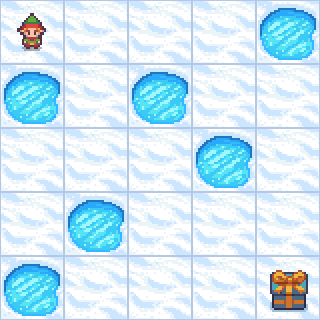

In [33]:
video_path="/content/replay.gif"
video_fps=1
record_video(env, q_table, video_path, video_fps)

from IPython.display import Image
Image('./replay.gif')